In [1]:
#importe a biblioteca pandas e iniciando spark
import pandas as pd

In [2]:
#lendo arquivo csv online no cenipa
leitura_dados = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')

In [3]:
df = pd.DataFrame(leitura_dados)
df

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,05/01/2012,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,06/01/2012,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,06/01/2012,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162,80458,80458,80458,80458,80458,ACIDENTE,-17.999194,-51.642861,JATAÍ,GO,...,30/12/2021,20:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
5163,80452,80452,80452,80452,80452,ACIDENTE,-22.585556,-50.753889,MARACAÍ,SP,...,31/12/2021,09:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
5164,80457,80457,80457,80457,80457,INCIDENTE GRAVE,-29.695833,-51.081667,NOVO HAMBURGO,RS,...,31/12/2021,11:59:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5165,80460,80460,80460,80460,80460,INCIDENTE,-25.403333,-49.233611,CURITIBA,PR,...,31/12/2021,15:12:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [4]:
df.info() #para obter informações do dataframe e verificar inconsistências

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5167 non-null   int64 
 1   codigo_ocorrencia1              5167 non-null   int64 
 2   codigo_ocorrencia2              5167 non-null   int64 
 3   codigo_ocorrencia3              5167 non-null   int64 
 4   codigo_ocorrencia4              5167 non-null   int64 
 5   ocorrencia_classificacao        5167 non-null   object
 6   ocorrencia_latitude             4192 non-null   object
 7   ocorrencia_longitude            4192 non-null   object
 8   ocorrencia_cidade               5167 non-null   object
 9   ocorrencia_uf                   5167 non-null   object
 10  ocorrencia_pais                 5167 non-null   object
 11  ocorrencia_aerodromo            5167 non-null   object
 12  ocorrencia_dia                  5167 non-null   

In [5]:
#Excluindo as colunas codigo_ocorrencia1, codigo_ocorrencia2, codigo_ocorrencia3, codigo_ocorrencia4, ocorrencia_latitude e ocorrencia_longitude
df = df.drop(columns=['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_latitude', 'ocorrencia_longitude', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'total_recomendacoes'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5167 non-null   int64 
 1   ocorrencia_classificacao        5167 non-null   object
 2   ocorrencia_cidade               5167 non-null   object
 3   ocorrencia_uf                   5167 non-null   object
 4   ocorrencia_pais                 5167 non-null   object
 5   ocorrencia_aerodromo            5167 non-null   object
 6   ocorrencia_dia                  5167 non-null   object
 7   ocorrencia_hora                 5166 non-null   object
 8   investigacao_aeronave_liberada  5001 non-null   object
 9   investigacao_status             4910 non-null   object
 10  total_aeronaves_envolvidas      5167 non-null   int64 
 11  ocorrencia_saida_pista          5167 non-null   object
dtypes: int64(2), object(10)
memory usage: 484.5+ KB


In [7]:
df

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,INCIDENTE,PORTO ALEGRE,RS,BRASIL,SBPA,05/01/2012,20:27:00,***,FINALIZADA,1,NÃO
1,45331,ACIDENTE,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,1,NÃO
2,45333,ACIDENTE,VIAMÃO,RS,BRASIL,****,06/01/2012,13:00:00,NaN,FINALIZADA,1,NÃO
3,45401,ACIDENTE,SÃO SEBASTIÃO,SP,BRASIL,****,06/01/2012,17:00:00,***,NaN,1,NÃO
4,45407,ACIDENTE,SÃO SEPÉ,RS,BRASIL,****,06/01/2012,16:30:00,SIM,FINALIZADA,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...
5162,80458,ACIDENTE,JATAÍ,GO,BRASIL,####,30/12/2021,20:30:00,SIM,ATIVA,1,NÃO
5163,80452,ACIDENTE,MARACAÍ,SP,BRASIL,*****,31/12/2021,09:30:00,SIM,ATIVA,1,NÃO
5164,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,BRASIL,SSNH,31/12/2021,11:59:00,SIM,FINALIZADA,1,NÃO
5165,80460,INCIDENTE,CURITIBA,PR,BRASIL,SBBI,31/12/2021,15:12:00,SIM,FINALIZADA,1,NÃO


In [8]:
#Verificando valores incoerentes na coluna '****', '*****', '####', '###!' ,'***', 'NaN'
df['ocorrencia_aerodromo'].unique()

array(['SBPA', 'SBGR', '****', 'SDAI', 'SBBE', 'SBUL', 'SBMA', 'SBBR',
       'SNWC', 'SBPR', 'SWRD', 'SDVH', 'SBMT', 'SBJR', 'SBRF', 'SBVT',
       'SBBH', 'SBJV', 'SBCT', 'SBCG', 'SBGL', 'SBLO', 'SDPW', 'SBSP',
       'SBJD', 'SDAM', 'SNCL', 'SNOD', 'SBBP', 'SWFN', 'SBEG', 'SBCF',
       'SSKT', 'SBBW', 'SWXQ', 'SBFZ', 'SBRB', 'SBRJ', 'SBSV', 'SBPJ',
       'SBME', 'SBRP', 'SBIL', 'SBBZ', 'SDCO', 'SBGO', 'SDMC', 'SBNF',
       'SBMO', 'SBBI', 'SBNV', 'SNOF', 'SNRU', 'SBBU', 'SSKG', 'SBGW',
       'SSBL', 'SBMQ', 'SSXO', 'SNTF', 'SBMG', 'SWMV', 'SWFR', 'SSCR',
       'SBUR', 'SBSR', 'SNAZ', 'SBNT', 'SBKP', 'SDBK', 'SBTD', 'SDBN',
       'SBCA', 'SDTF', 'SBPG', 'SBJC', 'SDRK', 'SBCB', 'SBCY', 'SJHR',
       'SDAA', 'SWEK', 'SIQE', 'SBSJ', 'SSOS', 'SBFI', 'SILT', 'SBBV',
       'SSDO', 'SDBB', 'SBCJ', 'SSNB', 'SBPS', 'SBMS', 'SWKO', 'SDIO',
       'SBUY', 'SDTB', 'SBTE', 'SWUI', 'SBSN', 'SNKB', 'SSBN', 'SBDN',
       'SDXF', 'SNDH', 'SJPT', 'SSOK', 'SSHS', 'SSSB', 'SBCP', 'SBTF',
      

In [9]:
#Verificando valores incoerentes na coluna '***', 'NaN'
df['investigacao_aeronave_liberada'].unique()

array(['***', 'SIM', nan, 'NÃO'], dtype=object)

In [10]:
#Substituindo os valores no Df por Não divulgado
df = df.replace(['****', '*****', '####', '###!', '***'], 'NÃO DIVULGADO')
df = df.fillna('NÃO DIVULGADO')

In [11]:
df

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,INCIDENTE,PORTO ALEGRE,RS,BRASIL,SBPA,05/01/2012,20:27:00,NÃO DIVULGADO,FINALIZADA,1,NÃO
1,45331,ACIDENTE,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,1,NÃO
2,45333,ACIDENTE,VIAMÃO,RS,BRASIL,NÃO DIVULGADO,06/01/2012,13:00:00,NÃO DIVULGADO,FINALIZADA,1,NÃO
3,45401,ACIDENTE,SÃO SEBASTIÃO,SP,BRASIL,NÃO DIVULGADO,06/01/2012,17:00:00,NÃO DIVULGADO,NÃO DIVULGADO,1,NÃO
4,45407,ACIDENTE,SÃO SEPÉ,RS,BRASIL,NÃO DIVULGADO,06/01/2012,16:30:00,SIM,FINALIZADA,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...
5162,80458,ACIDENTE,JATAÍ,GO,BRASIL,NÃO DIVULGADO,30/12/2021,20:30:00,SIM,ATIVA,1,NÃO
5163,80452,ACIDENTE,MARACAÍ,SP,BRASIL,NÃO DIVULGADO,31/12/2021,09:30:00,SIM,ATIVA,1,NÃO
5164,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,BRASIL,SSNH,31/12/2021,11:59:00,SIM,FINALIZADA,1,NÃO
5165,80460,INCIDENTE,CURITIBA,PR,BRASIL,SBBI,31/12/2021,15:12:00,SIM,FINALIZADA,1,NÃO


In [12]:
#df limpo para analise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5167 non-null   int64 
 1   ocorrencia_classificacao        5167 non-null   object
 2   ocorrencia_cidade               5167 non-null   object
 3   ocorrencia_uf                   5167 non-null   object
 4   ocorrencia_pais                 5167 non-null   object
 5   ocorrencia_aerodromo            5167 non-null   object
 6   ocorrencia_dia                  5167 non-null   object
 7   ocorrencia_hora                 5167 non-null   object
 8   investigacao_aeronave_liberada  5167 non-null   object
 9   investigacao_status             5167 non-null   object
 10  total_aeronaves_envolvidas      5167 non-null   int64 
 11  ocorrencia_saida_pista          5167 non-null   object
dtypes: int64(2), object(10)
memory usage: 484.5+ KB


In [13]:
#salvar novo df localmente para analise com Spark
df.to_csv('df_modificado.csv')

In [14]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [15]:
#lendo e carregando df modificado
df_pandas = pd.read_csv('df_modificado.csv', sep=',')

In [16]:
df_pandas = df_pandas.drop(columns=['Unnamed: 0'])
df_pandas

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,INCIDENTE,PORTO ALEGRE,RS,BRASIL,SBPA,05/01/2012,20:27:00,NÃO DIVULGADO,FINALIZADA,1,NÃO
1,45331,ACIDENTE,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,1,NÃO
2,45333,ACIDENTE,VIAMÃO,RS,BRASIL,NÃO DIVULGADO,06/01/2012,13:00:00,NÃO DIVULGADO,FINALIZADA,1,NÃO
3,45401,ACIDENTE,SÃO SEBASTIÃO,SP,BRASIL,NÃO DIVULGADO,06/01/2012,17:00:00,NÃO DIVULGADO,NÃO DIVULGADO,1,NÃO
4,45407,ACIDENTE,SÃO SEPÉ,RS,BRASIL,NÃO DIVULGADO,06/01/2012,16:30:00,SIM,FINALIZADA,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...
5162,80458,ACIDENTE,JATAÍ,GO,BRASIL,NÃO DIVULGADO,30/12/2021,20:30:00,SIM,ATIVA,1,NÃO
5163,80452,ACIDENTE,MARACAÍ,SP,BRASIL,NÃO DIVULGADO,31/12/2021,09:30:00,SIM,ATIVA,1,NÃO
5164,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,BRASIL,SSNH,31/12/2021,11:59:00,SIM,FINALIZADA,1,NÃO
5165,80460,INCIDENTE,CURITIBA,PR,BRASIL,SBBI,31/12/2021,15:12:00,SIM,FINALIZADA,1,NÃO


In [17]:
#convertendo df pandas em df spark
df = pd.DataFrame(df_pandas)
df = spark.createDataFrame(df_pandas)
df.show()

+-----------------+------------------------+--------------------+-------------+---------------+--------------------+--------------+---------------+------------------------------+-------------------+--------------------------+----------------------+
|codigo_ocorrencia|ocorrencia_classificacao|   ocorrencia_cidade|ocorrencia_uf|ocorrencia_pais|ocorrencia_aerodromo|ocorrencia_dia|ocorrencia_hora|investigacao_aeronave_liberada|investigacao_status|total_aeronaves_envolvidas|ocorrencia_saida_pista|
+-----------------+------------------------+--------------------+-------------+---------------+--------------------+--------------+---------------+------------------------------+-------------------+--------------------------+----------------------+
|            52242|               INCIDENTE|        PORTO ALEGRE|           RS|         BRASIL|                SBPA|    05/01/2012|       20:27:00|                 NÃO DIVULGADO|         FINALIZADA|                         1|                   NÃO|
|   

In [18]:
#Melhor visualização em pandas
df_type = df.limit(5).toPandas()
df_type

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,INCIDENTE,PORTO ALEGRE,RS,BRASIL,SBPA,05/01/2012,20:27:00,NÃO DIVULGADO,FINALIZADA,1,NÃO
1,45331,ACIDENTE,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,1,NÃO
2,45333,ACIDENTE,VIAMÃO,RS,BRASIL,NÃO DIVULGADO,06/01/2012,13:00:00,NÃO DIVULGADO,FINALIZADA,1,NÃO
3,45401,ACIDENTE,SÃO SEBASTIÃO,SP,BRASIL,NÃO DIVULGADO,06/01/2012,17:00:00,NÃO DIVULGADO,NÃO DIVULGADO,1,NÃO
4,45407,ACIDENTE,SÃO SEPÉ,RS,BRASIL,NÃO DIVULGADO,06/01/2012,16:30:00,SIM,FINALIZADA,1,NÃO


In [19]:
import matplotlib.pyplot as plt

In [20]:
#Agrupando por ocorrencia_classificacao
x = df.groupby('ocorrencia_classificacao').count().orderBy('count', ascending=False).toPandas()
x

,ocorrencia_classificacao,count
0,INCIDENTE,2809
1,ACIDENTE,1667
2,INCIDENTE GRAVE,691


Text(0.5, 1.0, 'Ocorrência por classificação')

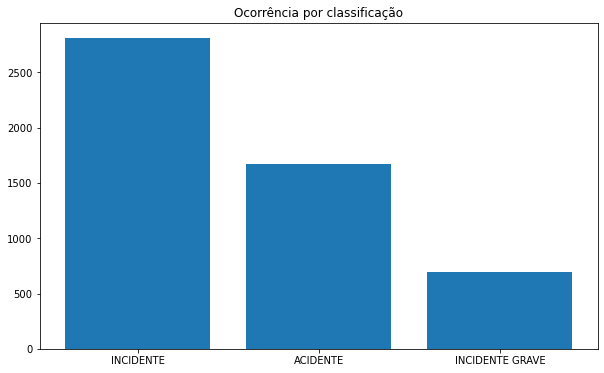

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(x['ocorrencia_classificacao'], x['count'])
plt.title('Ocorrência por classificação')

In [22]:
#Agrupando por ocorrencia_aerodromo
df.groupby('ocorrencia_aerodromo').count().orderBy('count', ascending=False).toPandas()

,ocorrencia_aerodromo,count
0,NÃO DIVULGADO,1905
1,SBGR,125
2,SBMT,121
3,SBBH,105
4,SBKP,98
...,...,...
508,SWRW,1
509,SJNC,1
510,SIVB,1
511,SSCE,1


In [23]:
#Agrupando por ocorrencia_cidade em df Pandas
df.groupby('ocorrencia_cidade').count().orderBy('ocorrencia_cidade', ascending=False).toPandas()

,ocorrencia_cidade,count
0,ÁLVARES MACHADO,3
1,ÁGUAS INTERNACIONAIS,1
2,ÁGUA LIMPA,1
3,ÁGUA CLARA,2
4,ÁGUA BOA,5
...,...,...
1048,AFUÁ,1
1049,AFONSO CLÁUDIO,1
1050,ACREÚNA,1
1051,ACARÁ,1


In [24]:
#Agrupando por investigacao_status em df Pandas
y = df.groupby('investigacao_status').count().orderBy('count', ascending=False).toPandas()
y

,investigacao_status,count
0,FINALIZADA,4489
1,ATIVA,421
2,NÃO DIVULGADO,257


Text(0.5, 1.0, 'Status de Investigação')

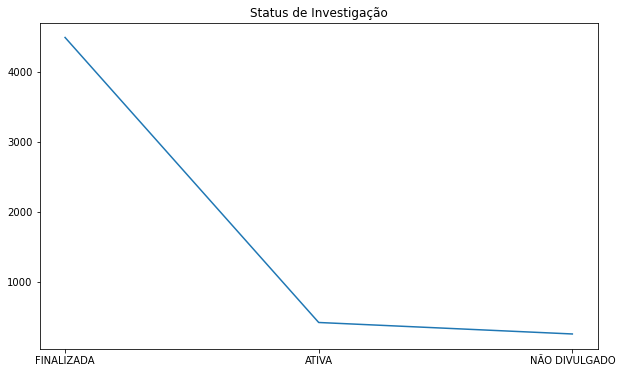

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y['investigacao_status'], y['count'])
plt.title('Status de Investigação')